# Project Part 1

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/sgeinitz/CS39AA-project/blob/main/project_part1.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sgeinitz/CS39AA-project/blob/main/project_part1.ipynb)

This notebook is intended to serve as a template to complete Part 1 of the projects. Feel free to modify this notebook as needed, but be sure to have the two main parts, a) a introductory proposal section describing what it is your doing to do and where the dataset originates, and b) an exploratory analysis section that has the histograms, charts, tables, etc. that are the output from your exploratory analysis. 

__Note you will want to remove the text above, and in the markdown cells below, and replace it with your own text describing the dataset, task, exploratory steps, etc.__

## 1. Introduction/Background

_In this section you will describe (in English) the dataset you are using as well as the NLP problem it deals with. For example, if you are planning to use the Twitter Natural Disaster dataset, then you will describe what the data and where it came as if you were explaining it to someone who does not know anything about the data. You will then describe how this is a __text classification__ problem, and that the labels are binary (e.g. a tweet either refers to a genuine/real natural disaster, or it does not)._ 

_Overall, this should be about a paragraph of text that could be read by someone outside of our class, and they could still understand what it is your project is doing._ 

_Note that you should __not__ simply write one sentence stating, "This project is base on the Kaggle competition: Predicting Natural Disasters with Twitter._"

_If you are still looking for datasets to use, consider the following resources to explore text datasets._

* https://huggingface.co/datasets/
* https://www.kaggle.com/datasets
* https://data-flair.training/blogs/machine-learning-datasets/ 
* https://pytorch.org/text/stable/datasets.html
* https://github.com/niderhoff/nlp-datasets 
* https://medium.com/@ODSC/20-open-datasets-for-natural-language-processing-538fbfaf8e38 
* https://imerit.net/blog/25-best-nlp-datasets-for-machine-learning-all-pbm/ 


_If you instead are planning to do a more research-oriented or applied type of project, then describe what it is that you plan to do._

_If it is research, then what do you want to understand/explain better?_

_If it is applied, then what it is you plan to build?_ 

The data set that I am using for my NLP project is from kaggle. The data set involves a given text and the emotions that is related to that text or predicted emotion for the text. That is what I am trying to do for my project which is to determine the type of emotion that is associated with the text or predict what the emotion is based on a text that is given. This is a text classification because it classify or puts the text in a group depending on what emotion the text is giving off. It is binary because it is going to be associted to only one emotion that the text is trying to convey. Even though at times text can display more than one emotions, there is always one emotion that can be displayed more off a text. The input for this project would be a any given text and the output would be what type of emotion the text is classified as. 

## 2. Exploratory Data Analysis

_You will now load the dataset and carry out some exploratory data analysis steps to better understand what text data looks like. See the examples from class on 10/. The following links provide some good resources of exploratory analyses of text data with Python._


* https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
* https://regenerativetoday.com/exploratory-data-analysis-of-text-data-including-visualization-and-sentiment-analysis/
* https://medium.com/swlh/text-summarization-guide-exploratory-data-analysis-on-text-data-4e22ce2dd6ad  
* https://www.kdnuggets.com/2019/05/complete-exploratory-data-analysis-visualization-text-data.html  


In [87]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emotion/Emotion_final.csv


In [88]:
data = pd.read_csv('/kaggle/input/emotion/Emotion_final.csv')

In [89]:
data.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


<Axes: >

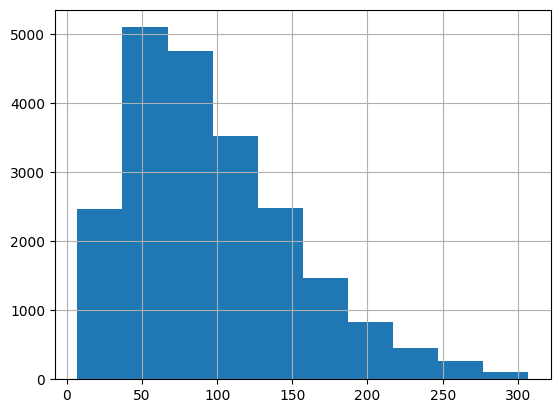

In [90]:
data['Text'].str.len().hist()

This is showing how many charcters there are in the text that I could possiby break it down to and narrow down. Based on this data best possible way is to trim the characters to less than 50. 

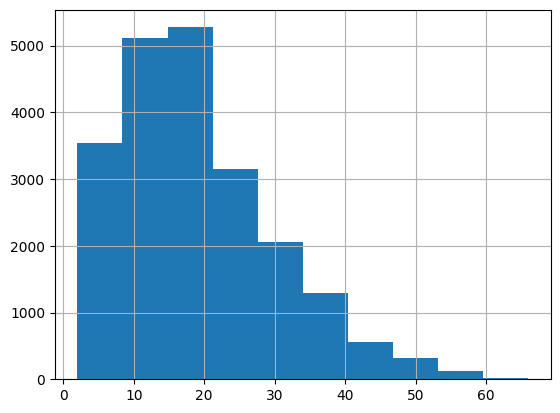

In [91]:
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

plot_word_number_histogram(data['Text'])

The histrogram is showing how many words are in the text. Ranges from what it looks to be 5 to I want to say 75. Would need to cut it down to around 20 since most text looks to be on average of that.

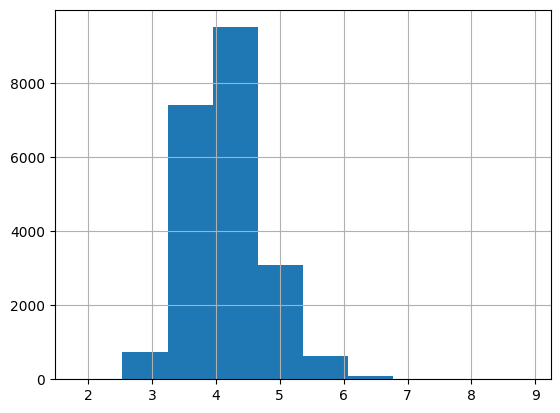

In [92]:
def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()

plot_word_length_histogram(data['Text'])

In the histogram it is showing what are the average word length in the text. This is showing that it is in between aaround 2.7 to 6.8. The average and good amount would be around 4. Might want to do more than that to more accuracy on what the emotions would come out to. just because 4 seems to be too little to just predict emotions.

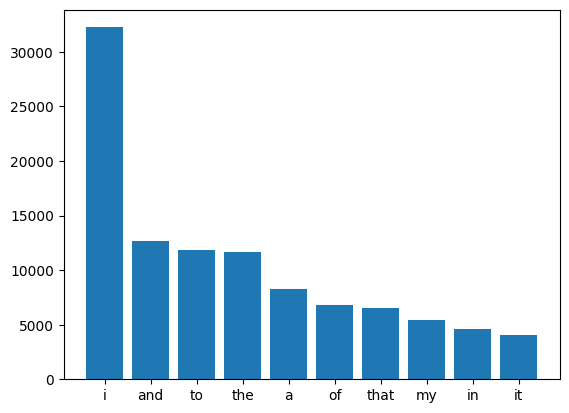

In [93]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)
    
plot_top_stopwords_barchart(data['Text'])

Wanted to filter out the stop words that could possibly cause the data to be putting the output incorrectly or take it out so the output could be more correct. It seems that I is the most occurent stop word that needs to be taken out of the text to get more of an accurate read. 

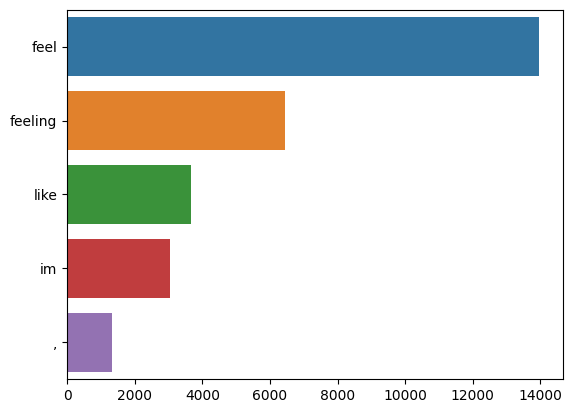

In [94]:
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)
    
plot_top_non_stopwords_barchart(data['Text'])

Here in he historgram wanted to see what other words would appear that has came up frequently. I could use these words as to target what the emotion could be once these words pop up. After these words pop up I could see what comes next that could determine what the emotions of text could come out to be.

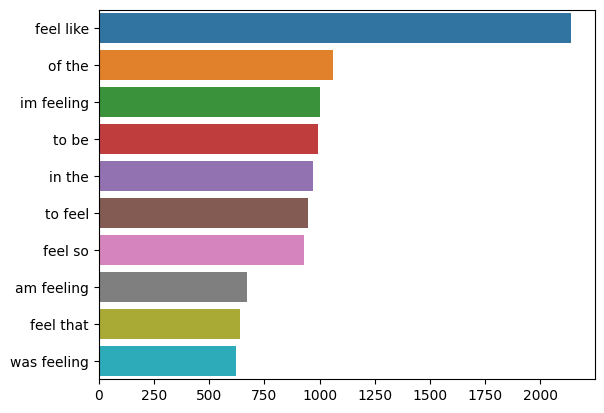

In [95]:
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)
    
plot_top_ngrams_barchart(data['Text'],2)

Used this to determine what two words go hand and hand together that could deteremine and help predict an emotion. The one that came out the most was feel like. Which would make sense since anytime someone were to express emoitons they would say something along the lines of "feel like."

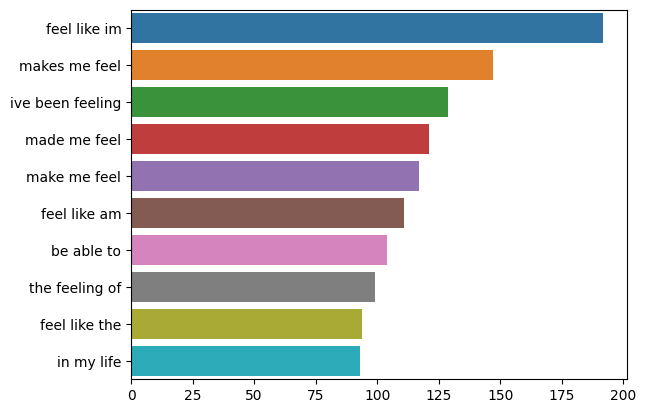

In [96]:
plot_top_ngrams_barchart(data['Text'],3)

I did the same thing with this histogram, but this time with three words coming together most often. Three words that are linked together seems to be feel like im. Might used this more because ususally a person would say these three words when expressing themselves. 

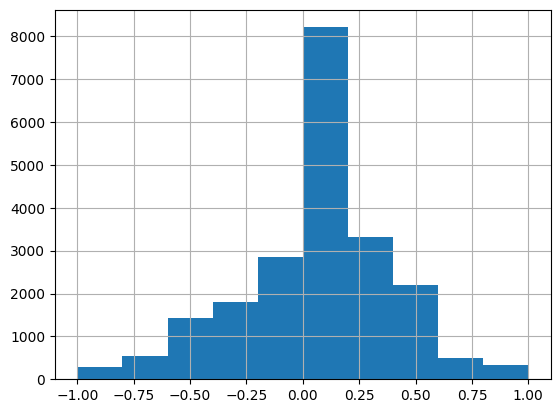

In [97]:
from textblob import TextBlob
    
def plot_polarity_histogram(text):
    
    def _polarity(text):
        return TextBlob(text).sentiment.polarity
        
    polarity_score =text.apply(lambda x : _polarity(x))
    polarity_score.hist()
    
plot_polarity_histogram(data['Text'])

Using polarity to see if emotions of text is either more happy or negative. Based on the histogram emotions are neutral. It's not one sided to see if it is postive emotions or negative. It's balanced which is good so know that it's not to skwed of a data. 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


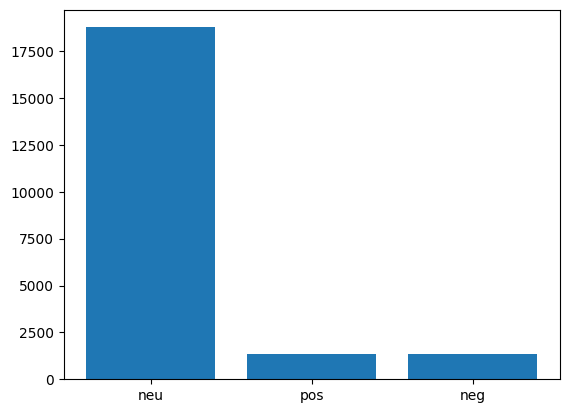

In [98]:
from textblob import TextBlob
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

def sentiment_vader(text, sid):
    ss = sid.polarity_scores(text)
    ss.pop('compound')
    return max(ss, key=ss.get)

def sentiment_textblob(text):
        x = TextBlob(text).sentiment.polarity
        
        if x<0:
            return 'neg'
        elif x==0:
            return 'neu'
        else:
            return 'pos'

def plot_sentiment_barchart(text, method='TextBlob'):
    if method == 'TextBlob':
        sentiment = text.map(lambda x: sentiment_textblob(x))
    elif method == 'Vader':
        nltk.download('vader_lexicon')
        sid = SentimentIntensityAnalyzer()
        sentiment = text.map(lambda x: sentiment_vader(x, sid=sid))
    else:
        raise ValueError('Textblob or Vader')
    
    plt.bar(sentiment.value_counts().index,
            sentiment.value_counts())
    
plot_sentiment_barchart(data['Text'], method='Vader')

Wantd to see more if the text that was given was skwed to be more negative or positive emotions. From the histogram it looks like it is not one sided. Which is good so it is not biased data. 

As a conclusion I could use the legnth of the text to help trim down the data so a model could determine emotions. Take out unnesscary stop words that do not need to be in text to help the model to get output. I could use three or two words that are usaully together to determine emotion. I. could take out unnesscary charcters as well. Based on historgrams this data seems to be neutral in determining emotions. It's not one side so would be good to use for this project. 